<a href="https://colab.research.google.com/github/prateeksha112/coding/blob/main/function_form_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.filters import threshold_multiotsu

In [ ]:
# def load_images(file_paths):
#     images = []
#     for file_path in file_paths:
#         image = cv2.imread(file_path)
#         images.append(image)
#     return images

In [ ]:
# file_paths = ["/content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_False_color.jpg, /content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_SWIR.jpg,/content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_True_color.jpg "]
# images = load_images(file_paths)


In [ ]:
file_name1 = '/content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_True_color.jpg'
file_name2 = '/content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_False_color.jpg'
file_name3 = '/content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_SWIR.jpg'

In [ ]:
def load_images(file_name1, file_name2, file_name3):
    img1 = cv2.imread(file_name1)
    img2 = cv2.imread(file_name2)
    img3 = cv2.imread(file_name3)
    return img1, img2, img3

In [ ]:
def merge_images(img1, img2, img3):
    b17, g17, r17 = cv2.split(img1)
    nir17, r217, g217 = cv2.split(img2)
    x17, y17, r317 = cv2.split(img3)

    img_combine = cv2.merge((b17, g17, r17, nir17, x17, y17))

    return img_combine

In [ ]:
def kmeans_segmentation(img_combine):
    img_shape = img_combine.shape
    img_2d = img_combine.reshape(img_shape[0] * img_shape[1], img_shape[2])

    kmeans = KMeans(n_clusters=5, random_state=0).fit(img_2d)
    labels = kmeans.labels_

    labels_2d = np.reshape(labels, (img_shape[0], img_shape[1]))
    return labels_2d

In [ ]:
def plot_kmeans_segmentation(labels_2d):
    plt.imshow(labels_2d)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
def plot_original_images(img1, img2, img3):
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[2].imshow(img3)
    for i in ax:
        i.set_xticks([])
        i.set_yticks([])
    plt.show()

In [ ]:
# def plot_original_images(img1, img2, img3, img4):
#     fig, ax = plt.subplots(2, 2, figsize=(15, 15))
#     ax[0].imshow(img1)
#     ax[1].imshow(img2)
#     ax[2].imshow(img3)
#     ax[3].imshow(img4)
#     for i in ax:
#         i.set_xticks([])
#         i.set_yticks([])
#     plt.show()
#     fig.savefig('Original images')

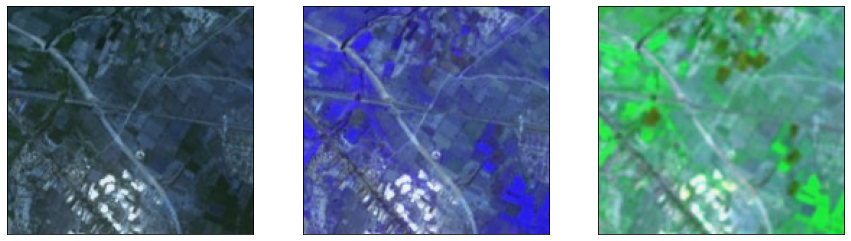

In [ ]:
img1_2017, img2_2017, img3_2017 = load_images(file_name1, file_name2, file_name3)
plot_original_images(img1_2017, img2_2017, img3_2017)



In [ ]:
def threshold_segmentation(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresholds = threshold_multiotsu(gray_image, classes=4)
    regions = np.digitize(gray_image, bins=thresholds)
    segm1 = (regions == 0)
    segm2 = (regions == 1)
    segm3 = (regions == 2)
    segm4 = (regions == 3)
    return segm3

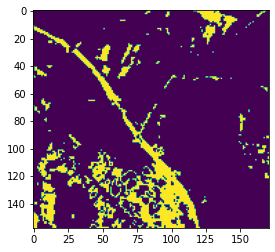

In [ ]:
img = cv2.imread('/content/2017-01-24-00_00_2017-01-24-23_59_Sentinel-2_L2A_True_color.jpg')
segm3 = threshold_segmentation(img)
plt.imsave('segmented_image.jpg', segm3)
plt.imshow(segm3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


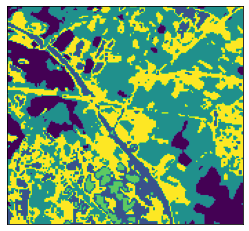

In [ ]:
img1_2017, img2_2017, img3_2017 = load_images(file_name1, file_name2, file_name3)

img_comp17 = merge_images(img1_2017, img2_2017, img3_2017)
labels_2d_17 = kmeans_segmentation(img_comp17)
plot_kmeans_segmentation(labels_2d_17)

